# Cross Validation

What is cross validation? 



In [18]:
import pandas as pd
df = pd.read_csv("C:\\Users\\dan.larson\\OneDrive - LabWare, Inc\\Documents\\Learning Projects\\aamlp\\Data\\WineQT.csv")

In [19]:
df.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.80,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [20]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
                   }

df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [24]:
df.quality.value_counts()

quality
2    483
3    462
4    143
1     33
5     16
0      6
Name: count, dtype: int64

In [22]:
## Splitting the data into sample test

df = df.sample(frac=1).reset_index(drop=True)

## Top 1000 rows are selected for training
df_train = df.head(800)

## Bottom for test

df_test = df.tail(343)


In [6]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

clf.fit(df_train[cols],df_train.quality)


DecisionTreeClassifier(max_depth=3)

In [7]:
# Generate Predictions on training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on test set
test_predictions = clf.predict(df_test[cols])

# Calculate Accuracy
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

# test accuracy

test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)


In [8]:
train_accuracy

0.6025

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('ytick',labelsize=20)
matplotlib.rc('xtick',labelsize=20)
%matplotlib inline

In [10]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [11]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = ['fixed acidity',
            'volatile acidity',
            'citric acid',
            'residual sugar',
            'chlorides',
            'free sulfur dioxide',
            'total sulfur dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol']

    clf.fit(df_train[cols],df_train.quality)
    # Generate Predictions on training set
    train_predictions = clf.predict(df_train[cols])
    # generate predictions on test set
    test_predictions = clf.predict(df_test[cols])
    # Calculate Accuracy
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    # test accuracy

    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

<function matplotlib.pyplot.show(close=None, block=None)>

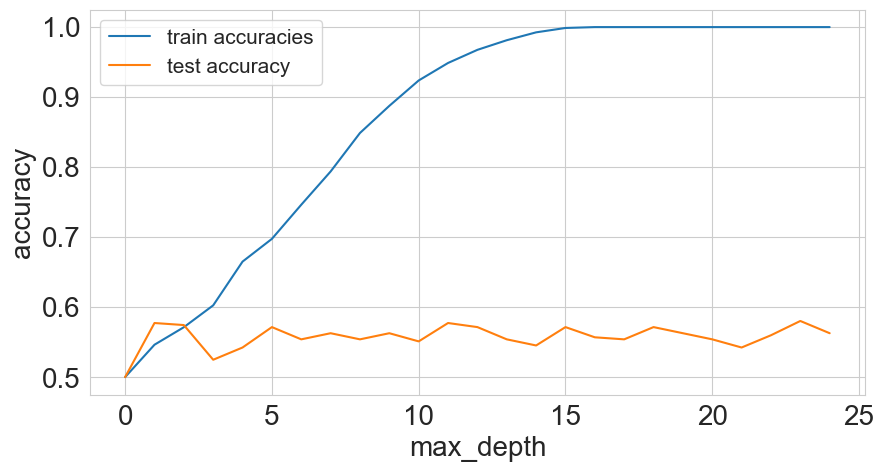

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label='train accuracies')
plt.plot(test_accuracies,label='test accuracy')
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)
plt.show

In [16]:
## K Fold Validatoin

from sklearn import model_selection

if __name__ == "__main__":
    df = pd.read_csv('C:\\Users\\dan.larson\\OneDrive - LabWare, Inc\\Documents\\Learning Projects\\aamlp\\Data\\adult.csv')

    # Create field called kfolds and fill with -1
    df["kfolds"] = -1

    ## randomize the rows of the data

    df = df.sample(frac=1).reset_index(drop=True)

    ## Initiate kfolds
    kf = model_selection.KFold(n_splits=5)

    ## Fill kfolds field

    for fold,(trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold']= fold

    df.to_csv("C:\\Users\\dan.larson\\OneDrive - LabWare, Inc\\Documents\\Learning Projects\\aamlp\\Data\\train_folds",index=False)


In [17]:
## stratified kfold 

from sklearn import model_selection

if __name__ == "__main__":
    df = pd.read_csv('C:\\Users\\dan.larson\\OneDrive - LabWare, Inc\\Documents\\Learning Projects\\aamlp\\Data\\adult.csv')

    # Create field called kfolds and fill with -1
    df["kfolds"] = -1

    ## randomize the rows of the data

    df = df.sample(frac=1).reset_index(drop=True)

    ##fetch target assumes that 

    y = df.target.values

    ## Initiate kfolds
    kf = model_selection.StratifiedKFold(n_splits=5)

    ## Fill kfolds field

    for fold,(trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold']= fold

    df.to_csv("C:\\Users\\dan.larson\\OneDrive - LabWare, Inc\\Documents\\Learning Projects\\aamlp\\Data\\train_folds",index=False)


AttributeError: 'DataFrame' object has no attribute 'target'

Text(0, 0.5, 'count')

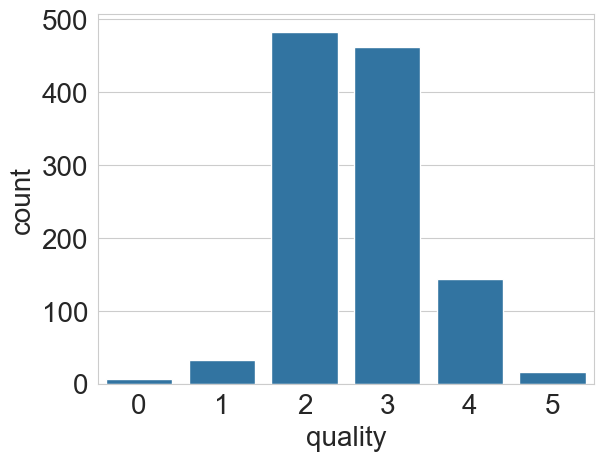

In [28]:
## Looking at the wine data distribution

b = sns.countplot(x='quality',data=df)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count", fontsize=20)


## Using kfold method why and when

- When you don't want to loss data for training. 
- Most useful on smaller datasets


Use sturge's rule for calculating bin size

number of bins = 1+log2(N)

In [30]:
## Stratified kfold for regression
## Only needed if the target variable isn't normally distributed. 

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data): 
    data["kfolds"] = -1

    ## randomize the rows of the data

    data = data.sample(frac=1).reset_index(drop=True)

    # implement sturges rule
    num_bins = int(np.floor(1+np.log2(len(data))))

    data.loc[:,"bins"] =pd.cut(
        data["target"],bins=num_bins,labels=False
    )

    kf = model_selection.StratifiedKFold(n_splits=5)

    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_,'kfolds'] = f

    data = data.drop("bins",axis=1)

    return data

if __name__ == "__main__":
    X,y = datasets.make_regression(
        n_samples = 15000, n_features=100, n_targets=1
    )

    df= pd.DataFrame(
        X,
        columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:,"target"]= y

    df = create_folds(df)

c:\Users\dan.larson\OneDrive - LabWare, Inc\Documents\Learning Projects\aamlp\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## Notes

Determining a sampling method for cross validation is a really important step

kfolds and hold out methods are probably the best but there are others. 

### Things to research

methods for crossvalidation of unsupervised models. Methods for cross validation of large models. 